# Task - Prediction using Decision Tree  Algorithm

# Name - Akash Godbole

# DATA ANALYTICS - LGM Virtual Internship Program 2021

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_csv('Iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.shape

(150, 6)

In [5]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

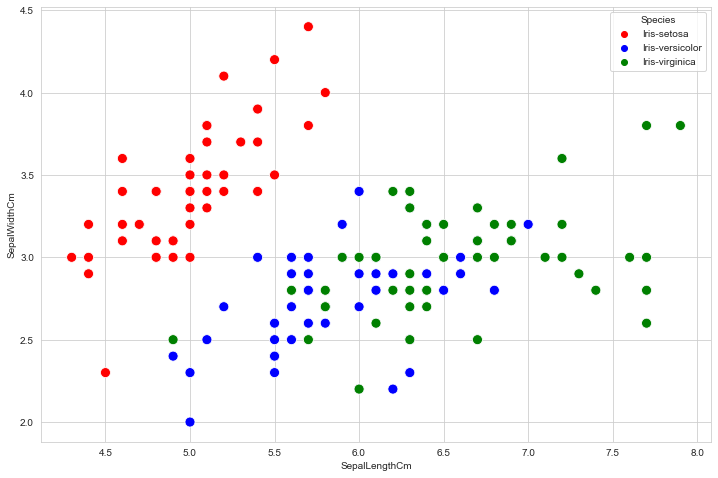

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=iris_data['SepalLengthCm'],y=iris_data['SepalWidthCm'],hue=iris_data['Species'],palette=['red','blue','green'],s=100)

In [9]:
iris_data.drop(['Id'], axis=1,inplace=True)

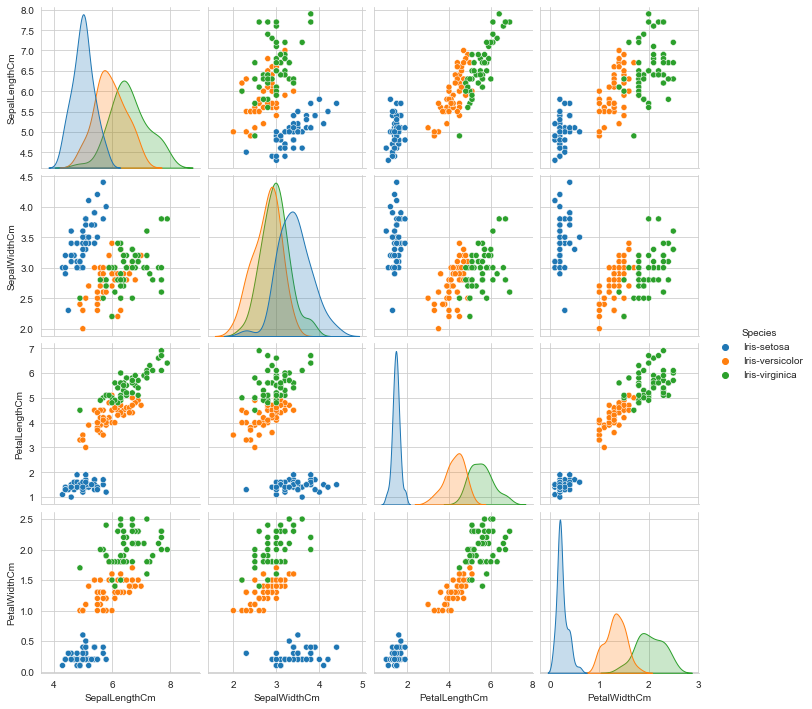

In [10]:
sns.pairplot(data=iris_data, hue= 'Species')
plt.show()

<AxesSubplot:>

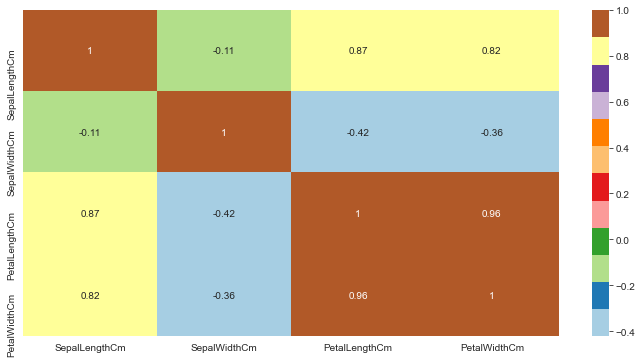

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(iris_data.corr(),cmap='Paired',annot=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test= train_test_split(iris_data, test_size=0.2)

In [14]:
train.shape

(120, 5)

In [15]:
test.shape

(30, 5)

In [16]:
x_train=train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train=train.Species

In [17]:
x_test=test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_test=test.Species

In [18]:
from sklearn import metrics

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
iris_dTree = DecisionTreeClassifier()

In [21]:
iris_dTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
predict=iris_dTree.predict(x_test)

In [23]:
metrics.accuracy_score(predict,y_test)

0.9

Accuracy of Model is 90%

In [24]:
x = iris_data.drop(columns = ['Species'])
y = iris_data['Species']

In [25]:
iris_DTree=DecisionTreeClassifier()
iris_DTree.fit(x,y)

DecisionTreeClassifier()

In [26]:
from sklearn import tree
import graphviz

[Text(418.5, 747.4499999999999, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 611.55, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 611.55, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 475.65, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 339.74999999999994, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 203.8499999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 339.74999999999994, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 203.8499999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 203.8499999999999, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923

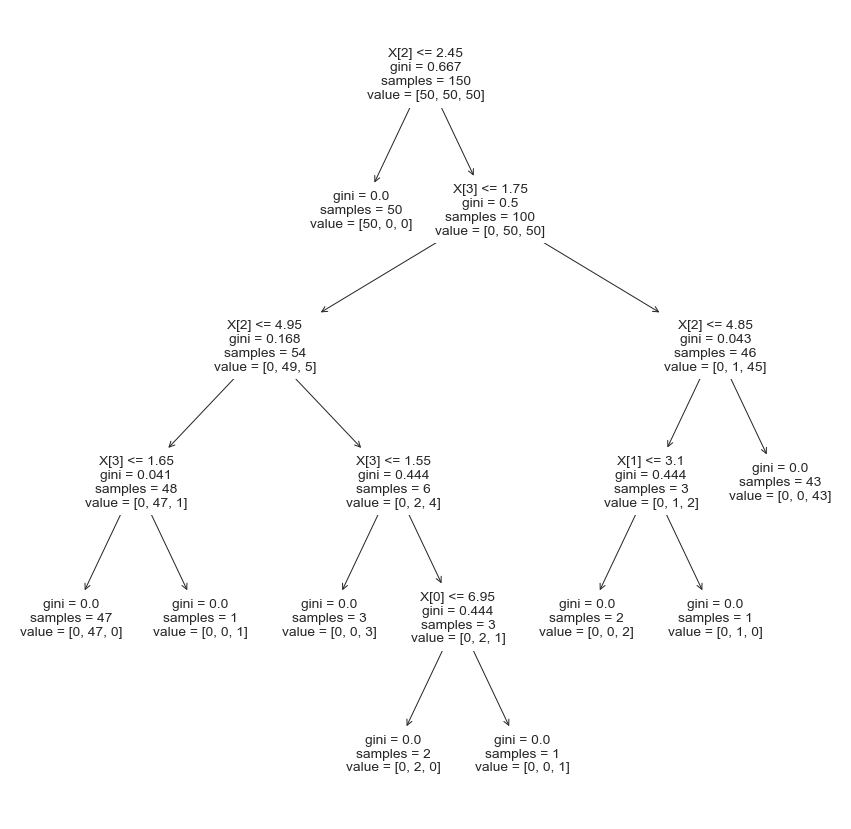

In [27]:
plt.figure(figsize=(15,15))
tree.plot_tree(iris_DTree)

In [28]:
feature_names = x.columns
labels = y.unique()

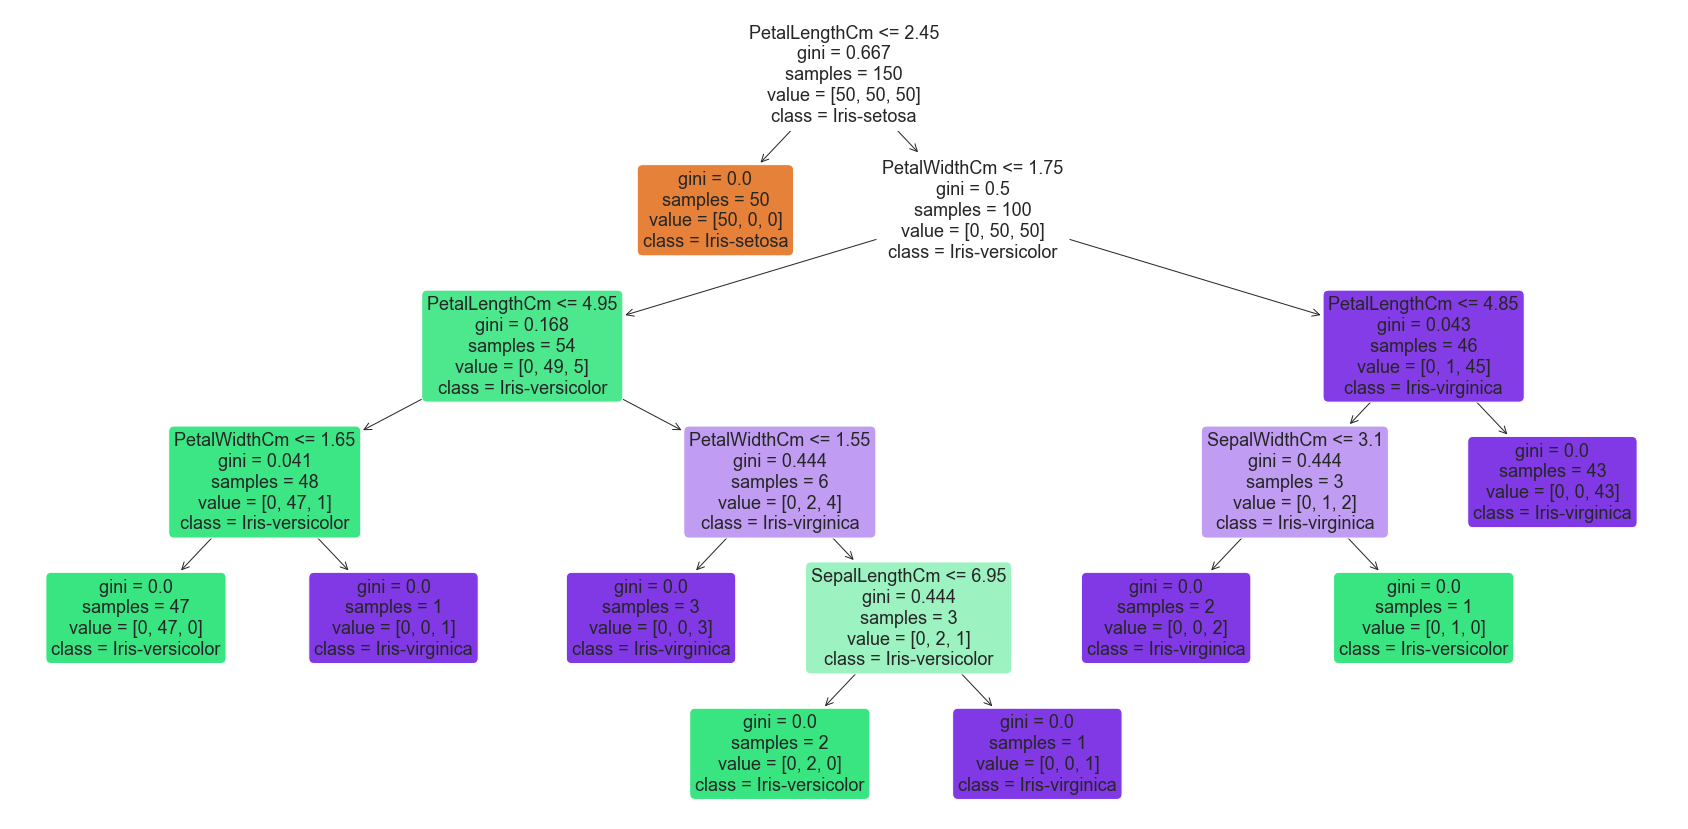

In [29]:
from sklearn import tree
plt.figure(figsize=(30,15), facecolor ='w')
a = tree.plot_tree(iris_DTree,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=18)
plt.show()

# Conclusion :

Firstly, we will begin from the root node which is the top (depth 0): We asks a question whether the flower’s petal length is smaller than 2.45 or not? 
Here suppose it is, then we move down to the root’s left child node which happens to be a leaf node(one with no child nodes),
so it does not ask any further question: it simply looks at the prediction class for that node and our model predicts that the flower you found was *Iris setosa*.

Now we have another Flower and it's petal length is greater than 2.45 cm. So this time it moves towards the root’s right child node(depth 1), which is not a leaf node, and asks another question whether the petal width is smaller than 1.75 cm or not? If yes,flower is most likely to be Iris versicolor. If no, your flower is most likely to be Iris virginica.